In [1]:
# Importing the Velkoz signal processing library:
from signal_processing.core_signal_objects import AudioSignal
import librosa
import librosa.display

# Importing data manipulation packages:
import pandas as pd
import numpy as np

# Importing visualization packages:
import matplotlib.pyplot as plt

/Users/matthewteelucksingh/miniconda3/envs/signal_processing/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
"Extracting wav audio files from the ESC-50 Dataset:"

# Extracting the ESC-50 csv file with audio file data labels:
esc50_metadata = pd.read_csv("../data/ESC-50-master/meta/esc50.csv")
audio_file_dir_path = "../data/ESC-50-master/audio"

# A Dog audio sound:
test_dog_path = audio_file_dir_path + f"/{esc50_metadata['filename'][0]}"
print(test_dog_path)

# Creating AudioSignal and performing all data transformations on it:
dog_signal = AudioSignal("../data/ESC-50-master/audio/1-100032-A-0.wav") 
dog_signal._perform_short_term_feature_extraction()
dog_signal._calculate_short_term_fourier_transform(2048)
dog_signal._calculate_spectogram()
dog_signal.calculate_mel_frequency_cepstral_coeffs()

../data/ESC-50-master/audio/1-100032-A-0.wav


[0.00000000e+00 2.15332031e+01 4.30664062e+01 ... 2.20069336e+04
 2.20284668e+04 2.20500000e+04] <class 'numpy.ndarray'> (1025,)
[[8.4674096e-04 3.7085142e-03 4.5342459e-03 ... 9.1368873e-03
  1.3401565e-03 2.0033836e-05]
 [7.7039521e-04 4.0049576e-03 6.2114247e-03 ... 9.0126880e-03
  1.1588202e-03 1.8918065e-05]
 [5.4876984e-04 5.3631286e-03 6.2795314e-03 ... 8.2839858e-03
  7.1658986e-04 1.5639491e-05]
 ...
 [8.6375610e-07 4.6542295e-06 2.5237132e-05 ... 4.2855345e-06
  2.2745361e-07 5.6023715e-09]
 [8.6712396e-07 2.5296358e-06 4.5562729e-06 ... 2.6439375e-06
  4.0678754e-07 4.6492565e-09]
 [7.9067615e-07 1.2818808e-06 1.0636936e-06 ... 2.1540845e-07
  4.6404978e-07 8.6295726e-09]] <class 'numpy.ndarray'> (1025, 19)


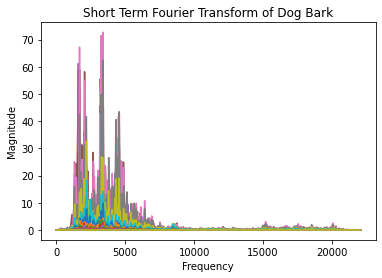

In [4]:
# Exploring the frequency and magnitude stft data:
print(dog_signal.stft_frequency, type(dog_signal.stft_frequency), dog_signal.stft_frequency.shape)    
print(dog_signal.stft_magnitude, type(dog_signal.stft_magnitude), dog_signal.stft_magnitude.shape)
"""for x in dog_signal.stft_magnitude:
    print(type(x), x.shape, len(x))  
"""

# Plotting the STFT:
plt.plot(dog_signal.stft_frequency, dog_signal.stft_magnitude)
plt.title("Short Term Fourier Transform of Dog Bark")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

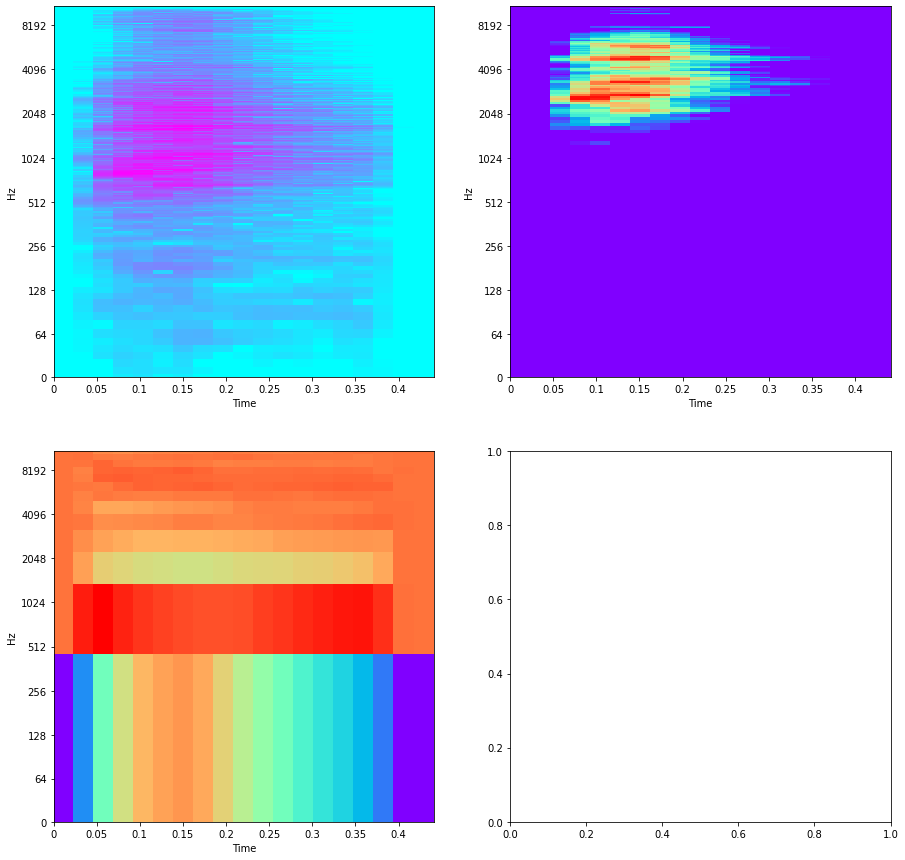

In [24]:
# Plotting the spectogram data:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# The Traditional Spectogram:
librosa.display.specshow(
    dog_signal.stft_Db_specdata,
    sr = dog_signal.sampling_rate,
    hop_length = dog_signal.hop_length,
    x_axis = "time",
    y_axis = "log",
    cmap = "cool",
    ax=ax[0, 0])

# The Mel Spectogram:
librosa.display.specshow(
    dog_signal.mel_Db_specdata,
    sr = dog_signal.sampling_rate,
    hop_length = dog_signal.hop_length,
    x_axis = 'time',
    y_axis = 'log',
    cmap = 'rainbow',
    ax=ax[0, 1])

# The Mel Frequency Cepstral Coefficients:
librosa.display.specshow(
    dog_signal.mfccs,
    sr = dog_signal.sampling_rate,
    hop_length = dog_signal.hop_length,
    x_axis = 'time',
    y_axis = 'log',
    cmap = 'rainbow',
    ax = ax[1, 0])